In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pylab
# Рисуем графики не создавая новых окон
%matplotlib inline

In [13]:
import random
def generateSimpleBollobasRiordanGraph(n):
    G = nx.MultiDiGraph()
    G.add_node(0)
    G.add_edge(0, 0)
    # список всех вершин графа, каждая из них входит в него в количестве, равном её степени
    repeated_nodes = [0, 0]
    while G.number_of_nodes() < n:
        new_node = G.number_of_nodes()
        G.add_node(new_node)
        # для возможности петли
        repeated_nodes.append(new_node)
        # выбираем конец ребра пропорционально степени вершины
        destination = random.choice(repeated_nodes)
        repeated_nodes.append(destination)
        G.add_edge(new_node, destination)
    return G

In [14]:
def generateBollobasRiordanGraph(n, m):
    G1mn = generateSimpleBollobasRiordanGraph(m * n)
    G = nx.MultiDiGraph()
    # объединяем вершины в последовательные группы по m: {0,...,m-1}, {m, ..., 2m-1}, ..., {m(n-1), ..., mn - 1}
    for u, v in G1mn.edges():
        u_new, v_new = u / m, v / m
        G.add_edge(u_new, v_new)
    return G

In [18]:
M = 3
nodes_counts, fractions = [], []
for N in xrange(100, 10100, 100):
    p = 0.3
    G = generateBollobasRiordanGraph(N, M)
    for v in G.nodes():
        if random.random() < p:
            G.remove_node(v)
    LCC_size = len(next(nx.connected_components(nx.MultiGraph(G))))
    fractions.append(LCC_size / float(G.number_of_nodes()))
    nodes_counts.append(N)

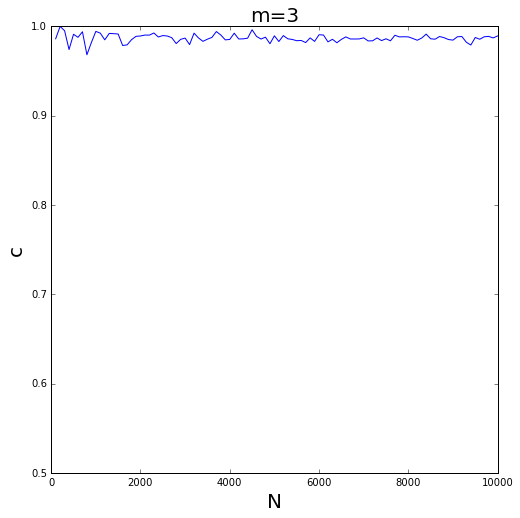

In [19]:
pylab.rcParams['figure.figsize'] = 8, 8
plt.plot(nodes_counts, fractions)
plt.ylim(0.5, 1)
plt.title('m=%d' % M, fontsize=20)
plt.ylabel("c", fontsize=20)
plt.xlabel("N", fontsize=20)
plt.show()

In [20]:
sum(fractions)/len(fractions)

0.9868857275067718